<a href="https://colab.research.google.com/github/MachukaJoy/NLP_with_Disaster_Tweets/blob/main/Module9_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Core packages for general use throughout the notebook.

import random
import warnings
import time
import datetime
from warnings import filterwarnings

# For customizing our plots.

from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

from warnings import filterwarnings
warnings.filterwarnings('ignore')

# Previewing Data

In [95]:
df_train = pd.read_csv('train.csv')
df_train.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [96]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [97]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


# Data Cleaning

In [98]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
id             0
keyword       26
location    1105
text           0
dtype: int64


In [99]:
# fill missing values with 'unknown' since missing values are in keyword and location columns
df_train['keyword'] = df_train['keyword'].fillna('unknown')
df_train['location'] = df_train['location'].fillna('unknown')
# confirm missing values are gone
print(df_train.isnull().sum())

id          0
keyword     0
location    0
text        0
target      0
dtype: int64


In [100]:
# fill missing values with 'unknown' since missing values are in keyword and location columns
df_test['keyword'] = df_train['keyword'].fillna('unknown')
df_test['location'] = df_train['location'].fillna('unknown')
# confirm missing values are gone
print(df_test.isnull().sum())

id          0
keyword     0
location    0
text        0
dtype: int64


In [101]:
# check for duplicated values
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [102]:
# Count occurrences of each location
location_counts = df_train['location'].value_counts()

# Display the counts
print(location_counts)

# Counts as a DataFrame
location_counts_df = location_counts.reset_index()
location_counts_df.columns = ['Location', 'Count']

# Display the top 10 locations
print(location_counts_df.head(50))

location
unknown                         2533
USA                              104
New York                          71
United States                     50
London                            45
                                ... 
Surulere Lagos,Home Of Swagg       1
MontrÌ©al, QuÌ©bec                 1
Montreal                           1
ÌÏT: 6.4682,3.18287                1
Lincoln                            1
Name: count, Length: 3342, dtype: int64
             Location  Count
0             unknown   2533
1                 USA    104
2            New York     71
3       United States     50
4              London     45
5              Canada     29
6             Nigeria     28
7                  UK     27
8     Los Angeles, CA     26
9               India     24
10             Mumbai     22
11     Washington, DC     21
12              Kenya     20
13          Worldwide     19
14        Chicago, IL     18
15          Australia     18
16         California     17
17       New York, NY 

We see the location column needs a lot of cleaning for instance we have New york, New York City, New York, NY, NYC and probably others. We will therefore proceed to drop the column together with id column

# Text Preprocessing

In [103]:
# Core packages for text processing.
import re
import string

# Libraries for text preprocessing.
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from wordcloud import WordCloud, STOPWORDS

from textblob import TextBlob, Word


In [104]:
# Download required NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [105]:
!pip install langdetect

In [106]:
from langdetect import detect
from textblob import TextBlob

In [107]:
# Preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
df_train['clean_text'] = df_train['text'].apply(preprocess_text)
df_test['clean_text'] = df_test['text'].apply(preprocess_text)

In [108]:
# removes all non-alphanumeric characters
df_train['clean_text'] = df_train['clean_text'].str.replace('[^\w\s]', '', regex=True)
df_test['clean_text'] = df_test['clean_text'].str.replace('[^\w\s]', '', regex=True)


# Exploraratory Data Analysis

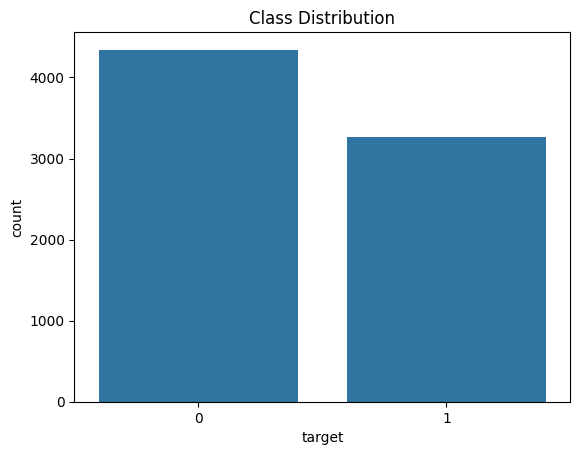

In [109]:
# Class distribution
sns.countplot(data=df_train, x='target')
plt.title('Class Distribution')
plt.show()

From the plot above We have less disaster texts.

In [110]:
# Most frequent keywords
print(df_train[df_train['target'] == 1]['keyword'].value_counts().head(10))
print(df_train[df_train['target'] == 0]['keyword'].value_counts().head(10))

keyword
unknown              42
wreckage             39
outbreak             39
derailment           39
typhoon              37
debris               37
oil%20spill          37
rescuers             32
suicide%20bombing    32
suicide%20bomb       32
Name: count, dtype: int64
keyword
body%20bags    40
harm           37
armageddon     37
deluge         36
ruin           36
wrecked        36
twister        35
explode        35
fear           35
siren          35
Name: count, dtype: int64


We see the most frequent disaster keywords and non-disaster keywords.

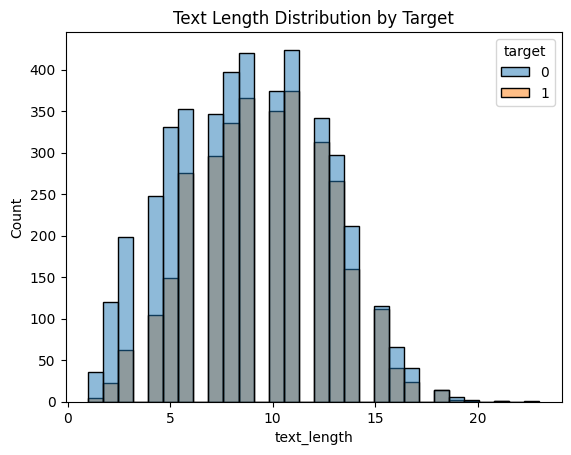

In [111]:
# Text length analysis
df_train['text_length'] = df_train['clean_text'].apply(lambda x: len(x.split()))
sns.histplot(data=df_train, x='text_length', hue='target', bins=30)
plt.title('Text Length Distribution by Target')
plt.show()

Generally, we can see that non_disastrous texts are longer than the disastrous texts


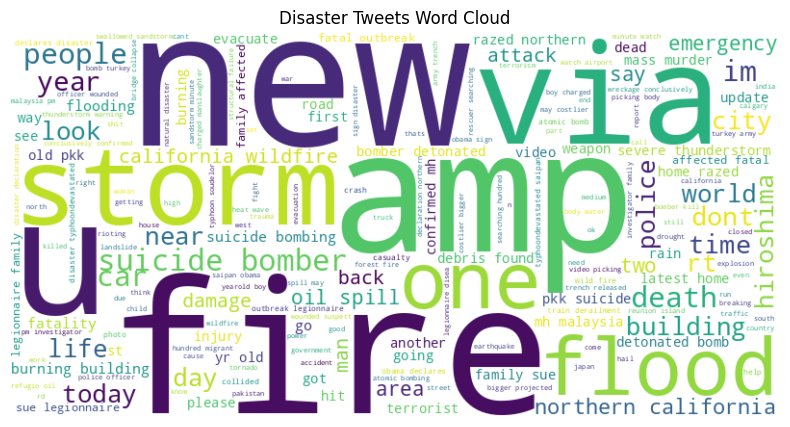

In [112]:
# Word Cloud
disaster_words = ' '.join(df_train[df_train['target'] == 1]['clean_text'])
non_disaster_words = ' '.join(df_train[df_train['target'] == 0]['clean_text'])
#  word cloud for disaster words
wc = WordCloud(width=800, height=400, background_color='white').generate(disaster_words)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Disaster Tweets Word Cloud')
plt.show()

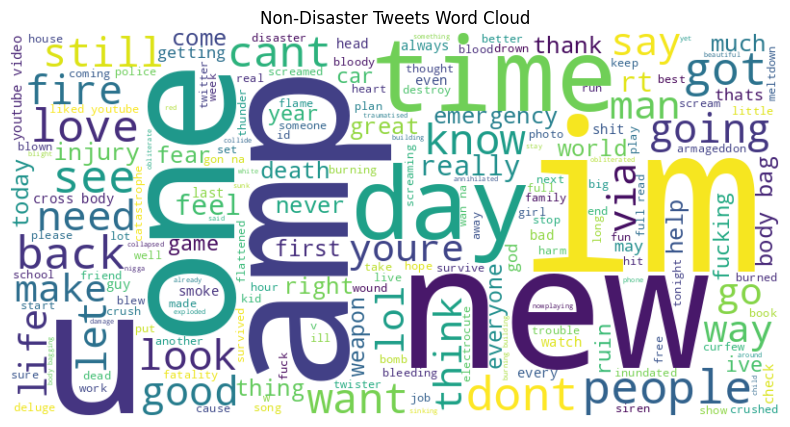

In [113]:
# word cloud for non disaster words
wc = WordCloud(width=800, height=400, background_color='white').generate(non_disaster_words)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Non-Disaster Tweets Word Cloud')
plt.show()

# Feature Engineering

In [114]:
# Duplicate df_train to create trainv
trainv = df_train.copy()
testv = df_test.copy()

In [115]:
# Remove 'text' column and rename 'clean_text' to 'text' in trainv
trainv = trainv.drop(columns=['text']).rename(columns={'clean_text': 'text'})

# Remove 'text' column and rename 'clean_text' to 'text' in testv
testv = testv.drop(columns=['text']).rename(columns={'clean_text': 'text'})


In [116]:
# visualize new trainv and testv text columns
print(trainv['text'])
print(testv['text'])

0              deed reason earthquake may allah forgive u
1                   forest fire near la ronge sask canada
2       resident asked shelter place notified officer ...
3       people receive wildfire evacuation order calif...
4       got sent photo ruby alaska smoke wildfire pour...
                              ...                        
7608    two giant crane holding bridge collapse nearby...
7609    ariaahrary thetawniest control wild fire calif...
7610                                 utckm volcano hawaii
7611    police investigating ebike collided car little...
7612    latest home razed northern california wildfire...
Name: text, Length: 7613, dtype: object
0                             happened terrible car crash
1       heard earthquake different city stay safe ever...
2       forest fire spot pond goose fleeing across str...
3                    apocalypse lighting spokane wildfire
4                      typhoon soudelor kill china taiwan
                              ..

In [117]:
# Create a frequency count of all unique words in the 'text' column of the 'train' DataFrame

temp_df1 = pd.Series(' '.join(trainv['text']).split()).value_counts()
temp_df1

,count
fire,352
like,347
im,306
amp,300
get,255
...,...
crapgamer,1
gamescom,1
hotteennsfwpornmilf,1
oiled,1


In [118]:
# Create a frequency count of all unique words in the 'text' column of the 'test' DataFrame
temp_df2 = pd.Series(' '.join(testv['text']).split()).value_counts()
temp_df2

,count
fire,159
like,146
amp,136
get,127
im,125
...,...
suggested,1
indy,1
otl,1
quinhii,1


In [119]:
# Identify words in the  frequency distributions that appear once or less and store them in 'drops1' and 'drops2' respectively.
# These words are rare and may be removed from further analysis.
drops1 = temp_df1[temp_df1 <= 1]
drops2 = temp_df2[temp_df2 <= 1]

In [120]:
# remove the words that appears once as from above variable drops1
trainv['text'] = trainv['text'].apply(lambda x: " ".join(x for x in x.split() if x not in drops1))

In [121]:
# # remove the words that appears once as from above variable drops2
testv['text'] = testv['text'].apply(lambda x: " ".join(x for x in x.split() if x not in drops2))

In [122]:
# preview
print(trainv['text'])

0              deed reason earthquake may allah forgive u
1                              forest fire near la canada
2       resident asked shelter place officer evacuatio...
3       people receive wildfire evacuation order calif...
4             got sent photo alaska smoke wildfire school
                              ...                        
7608    two giant crane holding bridge collapse nearby...
7609    ariaahrary thetawniest control wild fire calif...
7610                                 utckm volcano hawaii
7611    police investigating ebike collided car little...
7612    latest home razed northern california wildfire...
Name: text, Length: 7613, dtype: object


In [123]:
# Apply the TextBlob library to the 'text' column to tokenize each text entry into words.
trainv['text'].apply(lambda x: TextBlob(x).words).head()

,text
0,"[deed, reason, earthquake, may, allah, forgive..."
1,"[forest, fire, near, la, canada]"
2,"[resident, asked, shelter, place, officer, eva..."
3,"[people, receive, wildfire, evacuation, order,..."
4,"[got, sent, photo, alaska, smoke, wildfire, sc..."


In [124]:
# repeat above tokenizing for test
testv['text'].apply(lambda x: TextBlob(x).words).head()

,text
0,"[happened, terrible, car, crash]"
1,"[heard, earthquake, different, city, stay, saf..."
2,"[forest, fire, spot, pond, across, street, save]"
3,"[apocalypse, lighting, wildfire]"
4,"[typhoon, soudelor, kill, china, taiwan]"


In [125]:
# Create a new column 'n_tokens' in the train data that stores the number of tokens (words)
# for each text entry in the 'text' column. The lambda function uses TextBlob to tokenize the text and
# calculates the length of the resulting list of words (the number of tokens).
trainv['n_tokens'] = trainv['text'].apply(lambda x: len(TextBlob(x).words))

In [126]:
# repeat for test dataset
testv['n_tokens'] = testv['text'].apply(lambda x: len(TextBlob(x).words))

In [127]:
# Apply lemmatization to each word in the 'text' column of the 'trainv' DataFrame.
trainv['text'] = trainv['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [128]:
# repeat lemmatization for the tesst dataframe
testv['text'] = testv['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [129]:
# Compute the term frequency (TF) for each word in the 'text' column
tf1=(trainv['text'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0))

In [130]:
# repeat for the test dataframe
tf2=(testv['text'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0))

In [131]:
# Rename the columns of the 'tf1' Series to 'words' and 'tf1' for better readability.
# The 'words' column will represent the unique words, and the 'tf1' column will represent the term frequencies.
tf1.columns=['words','tf1']

In [132]:
# repeat the renaming for tf2 for the test dataframe
tf2.columns=['words','tf2']

In [133]:
# Sort the 'tf2' Series in descending order based on the term frequencies displaying the words with the highest frequency at the top.
tf2.sort_values(ascending=False)

,0
fire,159.0
like,146.0
amp,136.0
get,127.0
im,125.0
...,...
production,2.0
beer,2.0
floated,2.0
tampa,2.0


In [134]:
# sort tf1 and display highest words frequencies at the top
tf1.sort_values(ascending=False)

,0
fire,352.0
like,347.0
im,306.0
amp,300.0
u,261.0
...,...
earbuds,2.0
tiger,2.0
plastic,2.0
strict,2.0


In [135]:
# Combine all text entries in the 'text' column of the 'trainv' DataFrame into a single string.
text = " ".join(i for i in trainv.text)

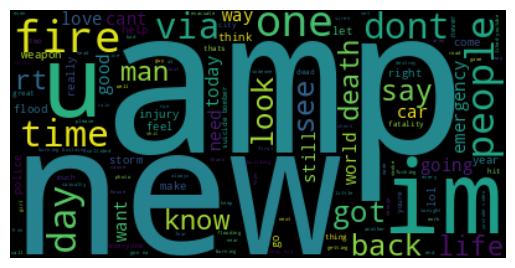

In [136]:
# a wordcloud visualization of train where the most frequent words are displayed larger.
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Modelling

In [137]:
# Download the VADER from NLTK.
# This lexicon is used for sentiment analysis, providing a set of words with associated sentiment scores.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [138]:
# load the SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [157]:
# Loading some sklearn packaces for modelling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [140]:
# initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [141]:
# test the SentimentIntensityAnalyzer for the statement belw
sia.polarity_scores("The fire is new")

{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.34}

In [142]:
# another SentimentIntensityAnalyzer test
sia.polarity_scores("Going back is hard")

{'neg': 0.318, 'neu': 0.682, 'pos': 0.0, 'compound': -0.1027}

In [143]:
# Apply the SentimentIntensityAnalyzer (SIA) to the first 10 rows of the 'text' column in the 'trainv' DataFrame.
trainv['text'][0:10].apply(lambda x: sia.polarity_scores(x))

,text
0,"{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp..."
1,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp..."
2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,"{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'comp..."
6,"{'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'comp..."
7,"{'neg': 0.293, 'neu': 0.488, 'pos': 0.22, 'com..."
8,"{'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'comp..."
9,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [144]:
# The 'compound' score represents the overall sentiment (positive or negative) of the text.
trainv['text'][0:10].apply(lambda x: sia.polarity_scores(x)['compound'])

,text
0,0.2732
1,-0.3400
2,0.0000
3,0.0000
4,0.0000
5,-0.3400
6,-0.6249
7,-0.1531
8,-0.3818
9,0.0000


In [145]:
# Create a new column 'polarity_scores' in the train DataFrame to store sentiment polarity scores (positive, neutral, negative, and compound)
trainv['polarity_scores'] = trainv['text'].apply(lambda x: sia.polarity_scores(x))

In [146]:
# Apply sentiment classification to the first 10 rows train DataFrame.
trainv["text"][0:10].apply(lambda x:"pos" if sia.polarity_scores(x)["compound"]>0 else "neg")

,text
0,pos
1,neg
2,neg
3,neg
4,neg
5,neg
6,neg
7,neg
8,neg
9,neg


In [147]:
# Apply the SentimentIntensityAnalyzer (SIA) to the first 10 rows of the with the 'compound' score represents the overall sentiment of the text
trainv['text'][0:10].apply(lambda x: sia.polarity_scores(x)['compound'])

,text
0,0.2732
1,-0.3400
2,0.0000
3,0.0000
4,0.0000
5,-0.3400
6,-0.6249
7,-0.1531
8,-0.3818
9,0.0000


In [148]:
# Create a new column 'sentiment_label' in the 'trainv' DataFrame to store sentiment labels for each text entry.
trainv["sentiment_label"] = trainv["text"].apply(lambda x:"pos" if sia.polarity_scores(x)["compound"]>0 else "neg")

# counts the occurrences of each sentiment label ("pos" and "neg").
trainv["sentiment_label"].value_counts()

,count
sentiment_label,
neg,5674
pos,1939


In [149]:
# Use LabelEncoder to convert the categorical sentiment labels ("pos" and "neg") in the 'sentiment_label' column to numerical values.
trainv["sentiment_label"] = LabelEncoder().fit_transform(trainv["sentiment_label"])

# The 'y' variable stores the encoded sentiment labels (target variable), and 'X' stores the corresponding text data (feature variable) for model training.
y = trainv["sentiment_label"]
X = trainv["text"]

In [150]:
# Initialize the CountVectorizer to convert the text data (in 'X') into a matrix of token counts.
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)
# retrueve feature names fom vectorizer and display a subset of feature names from index 10 to 14.
vectorizer.get_feature_names_out()[10:15]

array(['abia', 'ability', 'ablaze', 'able', 'abomb'], dtype=object)

In [151]:
# Convert the sparse matrix 'X_count' into a dense array
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Logistic Regression

In [152]:
# Train a Logistic Regression model using the 'X_count' feature matrix (term frequency counts of the text data) and the 'y' target labels (sentiment labels).
log_model = LogisticRegression().fit(X_count, y)

In [153]:
# Perform 5-fold cross-validation to evaluate the accuracy of the Logistic Regression model
cross_val_score(log_model, X_count, y, scoring="accuracy", cv=5).mean()

0.8376460630386635

In [154]:
# convert the new review into a feature vector using the same CountVectorizer ('vectorizer')
new_rewiew = pd.Series("this product is great")

# vectorize the new review
new_rewiew = vectorizer.fit(X).transform(new_rewiew)

# predict the sentiment label (positive or negative) of the new review.
log_model.predict(new_rewiew)

array([1])

In [158]:
# Predict the sentiment labels for the entire training set
log_pred = log_model.predict(X_count)

# Compute precision, recall, and F1-score for the Logistic Regression model
log_report = classification_report(y, log_pred, target_names=["Negative", "Positive"])

print("Classification Report for Logistic Regression:")
print(log_report)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Negative       0.96      0.99      0.98      5674
    Positive       0.98      0.89      0.93      1939

    accuracy                           0.97      7613
   macro avg       0.97      0.94      0.95      7613
weighted avg       0.97      0.97      0.97      7613



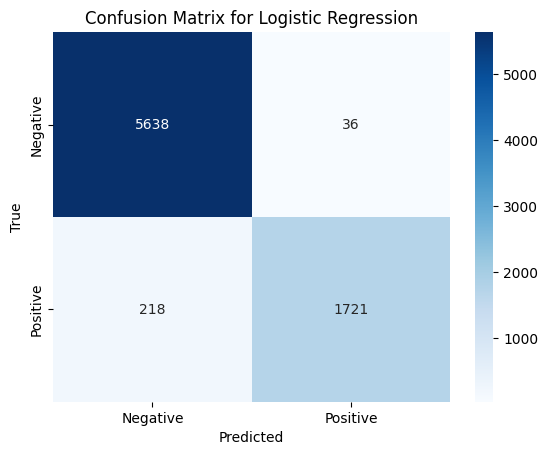

In [155]:
# Compute the confusion matrix for the Logistic Regression model
log_cm = confusion_matrix(y, log_pred)

# Plot the confusion matrix
sns.heatmap(log_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the model and evaluate its performance using cross-validation
rf_model.fit(X_count, y)

# Evaluate the model with 5-fold cross-validation using accuracy as the scoring metric
rf_accuracy = cross_val_score(rf_model, X_count, y, scoring="accuracy", cv=5).mean()

print(f"Random Forest Model Accuracy: {rf_accuracy}")


Random Forest Model Accuracy: 0.834623551448961


Classification Report for Random Forest:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      5674
    Positive       1.00      1.00      1.00      1939

    accuracy                           1.00      7613
   macro avg       1.00      1.00      1.00      7613
weighted avg       1.00      1.00      1.00      7613



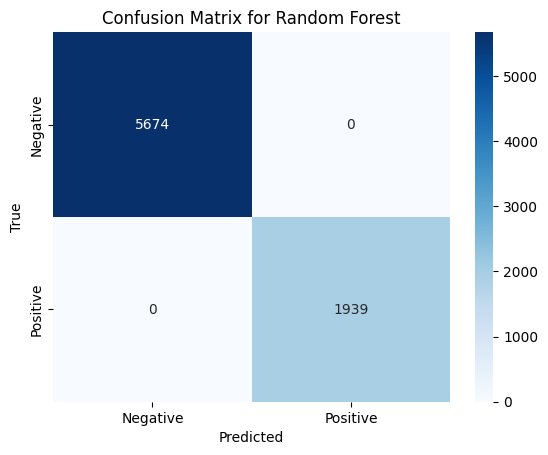

In [160]:
# Predict the sentiment labels for the entire training set
rf_pred = rf_model.predict(X_count)

# Compute precision, recall, and F1-score for the Random Forest model
rf_report = classification_report(y, rf_pred, target_names=["Negative", "Positive"])

print("Classification Report for Random Forest:")
print(rf_report)


# Compute the confusion matrix for the Random Forest model
rf_cm = confusion_matrix(y, rf_pred)

# Plot the confusion matrix
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Support Vector Machine

In [161]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize the Support Vector Machine model
svm_model = SVC()

# Train the model and evaluate its performance using cross-validation
svm_model.fit(X_count, y)

# Evaluate the model with 5-fold cross-validation using accuracy as the scoring metric
svm_accuracy = cross_val_score(svm_model, X_count, y, scoring="accuracy", cv=5).mean()

print(f"SVM Model Accuracy: {svm_accuracy}")


SVM Model Accuracy: 0.8086153357670343


Classification Report for SVM:
              precision    recall  f1-score   support

    Negative       0.96      1.00      0.98      5674
    Positive       0.99      0.88      0.93      1939

    accuracy                           0.97      7613
   macro avg       0.97      0.94      0.95      7613
weighted avg       0.97      0.97      0.97      7613



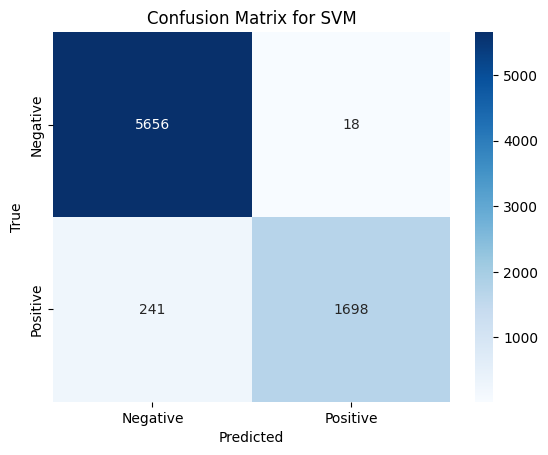

In [162]:
# Predict the sentiment labels for the entire training set
svm_pred = svm_model.predict(X_count)

# Compute precision, recall, and F1-score for the SVM model
svm_report = classification_report(y, svm_pred, target_names=["Negative", "Positive"])

print("Classification Report for SVM:")
print(svm_report)

# Compute the confusion matrix for the SVM model
svm_cm = confusion_matrix(y, svm_pred)

# Plot the confusion matrix
sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Model Performance Review

### Logistic regression

Precision:

- Negative class: 0.96 (high precision, meaning most of the predicted negative instances are actually negative).
- Positive class: 0.98 (very high precision, meaning most of the predicted positive instances are actually positive).<br><br>
Recall:

- Negative class: 0.99 (very high recall, meaning most of the actual negative instances are correctly predicted as negative).
- Positive class: 0.89 (good recall, but lower than the negative class, meaning some positive instances are misclassified).<br><br>
F1-Score:

- Negative class: 0.98 (a very strong score for the negative class, balancing precision and recall).
- Positive class: 0.93 (a solid F1 score for the positive class, but not as high as for the negative class).
Accuracy: 0.97 (overall, the model is accurate 97% of the time).

### Random Forest

The Random Forest model performs exceptionally well, with perfect scores across all metrics. This indicates that it perfectly classifies both negative and positive instances in the dataset. And is not a good model as also it shows overfitting. So we will disregard it

### Support Vector Machine

Precision:

- Negative class: 0.96 (good precision, most of the predicted negative instances are correctly classified).
- Positive class: 0.99 (very high precision for positive predictions).<br><br>
Recall:

- Negative class: 1.00 (perfect recall for negative class, meaning all actual negative instances are correctly identified).
- Positive class: 0.88 (good recall, but lower than for the negative class, meaning some positive instances are misclassified).<br><br>
F1-Score:

- Negative class: 0.98 (solid performance for the negative class).
- Positive class: 0.93 (solid performance for the positive class, but lower than negative class).<br><br>

Accuracy: 0.97 (overall accuracy of 97%).

### Conclusion

**The logistic regression model seems to be the best performing model followed by the support vector machines as the random forest shows strong signs of overfitting with small possibility of ovefitting in svm especially for recall**